In [1]:
import logging
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

In [2]:
import scipy.stats as ss
import numpy as np
import scipy.stats as ss
sc.set_figure_params(dpi=250, color_map='viridis')  # low dpi (dots per inch) yields small inline figures
import pandas as pd

In [3]:
VA_ecto_f = sc.read_h5ad("/home/gaurav/Gaurav/Berlin/Deep_Learning/pytorchVAE/experiment/Results/Without_testdata/VA/Ecto_12_VA.h5ad")
VAE_VA_ecto_f  = sc.read_h5ad("/home/gaurav/Gaurav/Berlin/Deep_Learning/pytorchVAE/experiment/Results/Without_testdata/VAE_VA/Ecto_12_VAE_VA.h5ad")
mVAE_flows_ecto_f  = sc.read_h5ad("/home/gaurav/Gaurav/Berlin/Deep_Learning/Project/models/NB_MMD/Objects/Zebrafish/adata_ecto_forward_12hpf.h5ad")

In [10]:
VA_ecto_b = sc.read_h5ad("/home/gaurav/Gaurav/Berlin/Deep_Learning/pytorchVAE/experiment/Results/Without_testdata/VA/Ecto_5p3_VA.h5ad")
VAE_VA_ecto_b  = sc.read_h5ad("/home/gaurav/Gaurav/Berlin/Deep_Learning/pytorchVAE/experiment/Results/Without_testdata/VAE_VA/Ecto_5p3_VAE_VA.h5ad")
mVAE_flows_ecto_b  = sc.read_h5ad("/home/gaurav/Gaurav/Berlin/Deep_Learning/Project/models/NB_MMD/Objects/Zebrafish/adata_ecto_backward_5.3hpf_.h5ad")

In [11]:
VA_meso_endo_f = sc.read_h5ad("/home/gaurav/Gaurav/Berlin/Deep_Learning/pytorchVAE/experiment/Results/Without_testdata/VA/Meso_Endo_12_VA.h5ad")
VAE_VA_meso_endo_f  = sc.read_h5ad("/home/gaurav/Gaurav/Berlin/Deep_Learning/pytorchVAE/experiment/Results/Without_testdata/VAE_VA/Meso_Endo_12_VAE_VA.h5ad")
mVAE_flows_meso_endo_f = sc.read_h5ad("/home/gaurav/Gaurav/Berlin/Deep_Learning/Project/models/NB_MMD/Objects/Zebrafish/adata_meso_endo_forward_12hpf_.h5ad")

In [12]:
VA_meso_endo_b = sc.read_h5ad("/home/gaurav/Gaurav/Berlin/Deep_Learning/pytorchVAE/experiment/Results/Without_testdata/VA/Meso_Endo_5p3_VA.h5ad")
VAE_VA_meso_endo_b  = sc.read_h5ad("/home/gaurav/Gaurav/Berlin/Deep_Learning/pytorchVAE/experiment/Results/Without_testdata/VAE_VA/Meso_Endo_5p3_VAE_VA.h5ad")
mVAE_flows_meso_endo_b = sc.read_h5ad("/home/gaurav/Gaurav/Berlin/Deep_Learning/Project/models/NB_MMD/Objects/Zebrafish/adata_meso_endo_backward_12hpf_.h5ad")

In [13]:
objects = [VA_ecto_f,VAE_VA_ecto_f,mVAE_flows_ecto_f,
        VA_meso_endo_f,VAE_VA_meso_endo_f,mVAE_flows_meso_endo_f,           
        VA_ecto_b,VAE_VA_ecto_b,mVAE_flows_ecto_b,
        VA_meso_endo_b,VAE_VA_meso_endo_b,mVAE_flows_meso_endo_b]

In [14]:
plot_data = []
obj = ["VA","VAE+VA","mVAE+flows"]
pred_data = ["Ecto at 12HPF","Meso/Endo at 12HPF","Ecto at 5.3HPF","Meso/Endo at 5.3HPF"]
for i in range(12):
	plot_data.append(np.vstack((objects[i].uns["mean_correlations"],objects[i].uns["std_correlations"],objects[i].uns["mean_slope"],objects[i].uns["std_slope"],np.repeat(obj[i%3],50),np.repeat(pred_data[i//3],50))))


In [15]:
data_df = pd.DataFrame(np.hstack(plot_data).T,columns=["Mean correlations","Std correlations","Mean_slope","Std_slope","Methods","Prediction"])

In [16]:
data_df["Mean correlations"] = data_df["Mean correlations"].astype(float)
data_df["Std correlations"] = data_df["Std correlations"].astype(float)
data_df["Mean_slope"] = data_df["Mean_slope"].astype(float)
data_df["Std_slope"] = data_df["Std_slope"].astype(float)

In [17]:
pca_pal = ["#d62728","#ff7f0e","#1f77b4"]

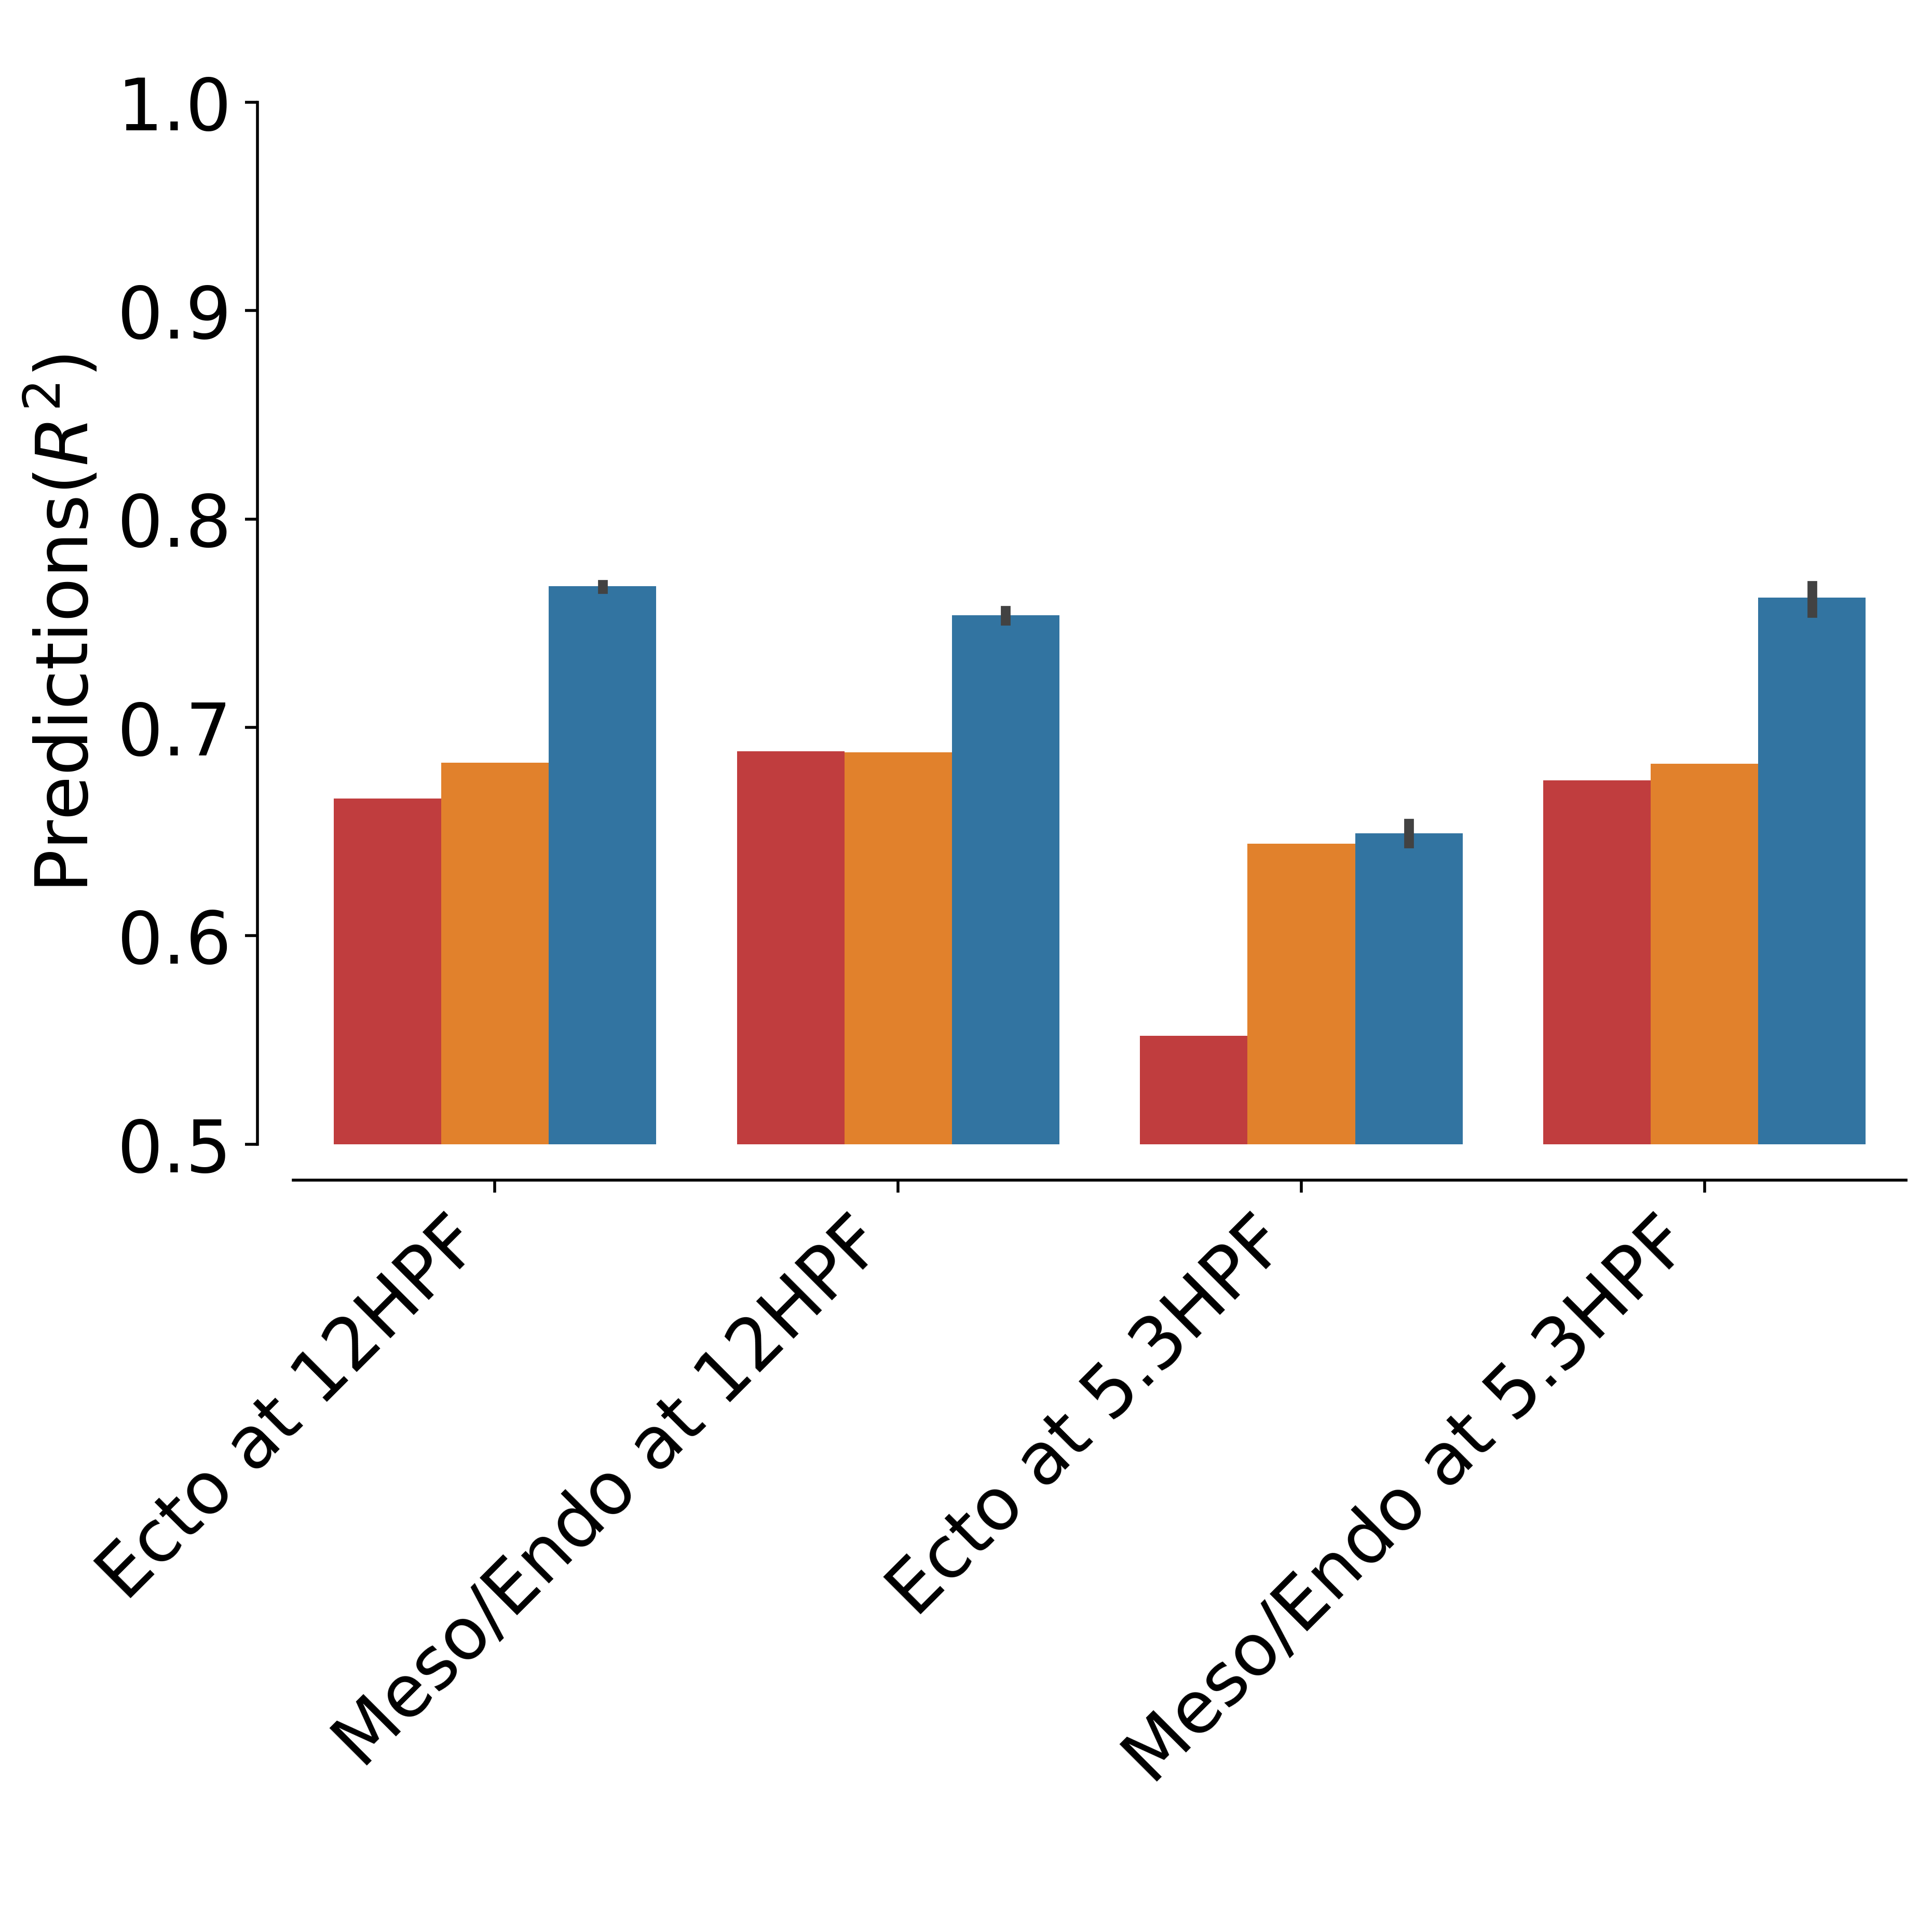

In [18]:
ax = sns.catplot(x ="Prediction",y="Std correlations",data=data_df,kind="bar",hue="Methods",palette=pca_pal,orient="v",legend= False,aspect=1.5)
font_size = 20
sns.despine(offset=10)
ax.set(ylim=(0.5, 1))
plt.title(" ",fontsize = font_size)
plt.xlabel(' ',fontsize = font_size)
plt.ylabel('Predictions($R^2$)',fontsize = font_size)
plt.tick_params(labelsize=font_size)
plt.xticks(rotation=45,ha='right')
plt.grid(False)

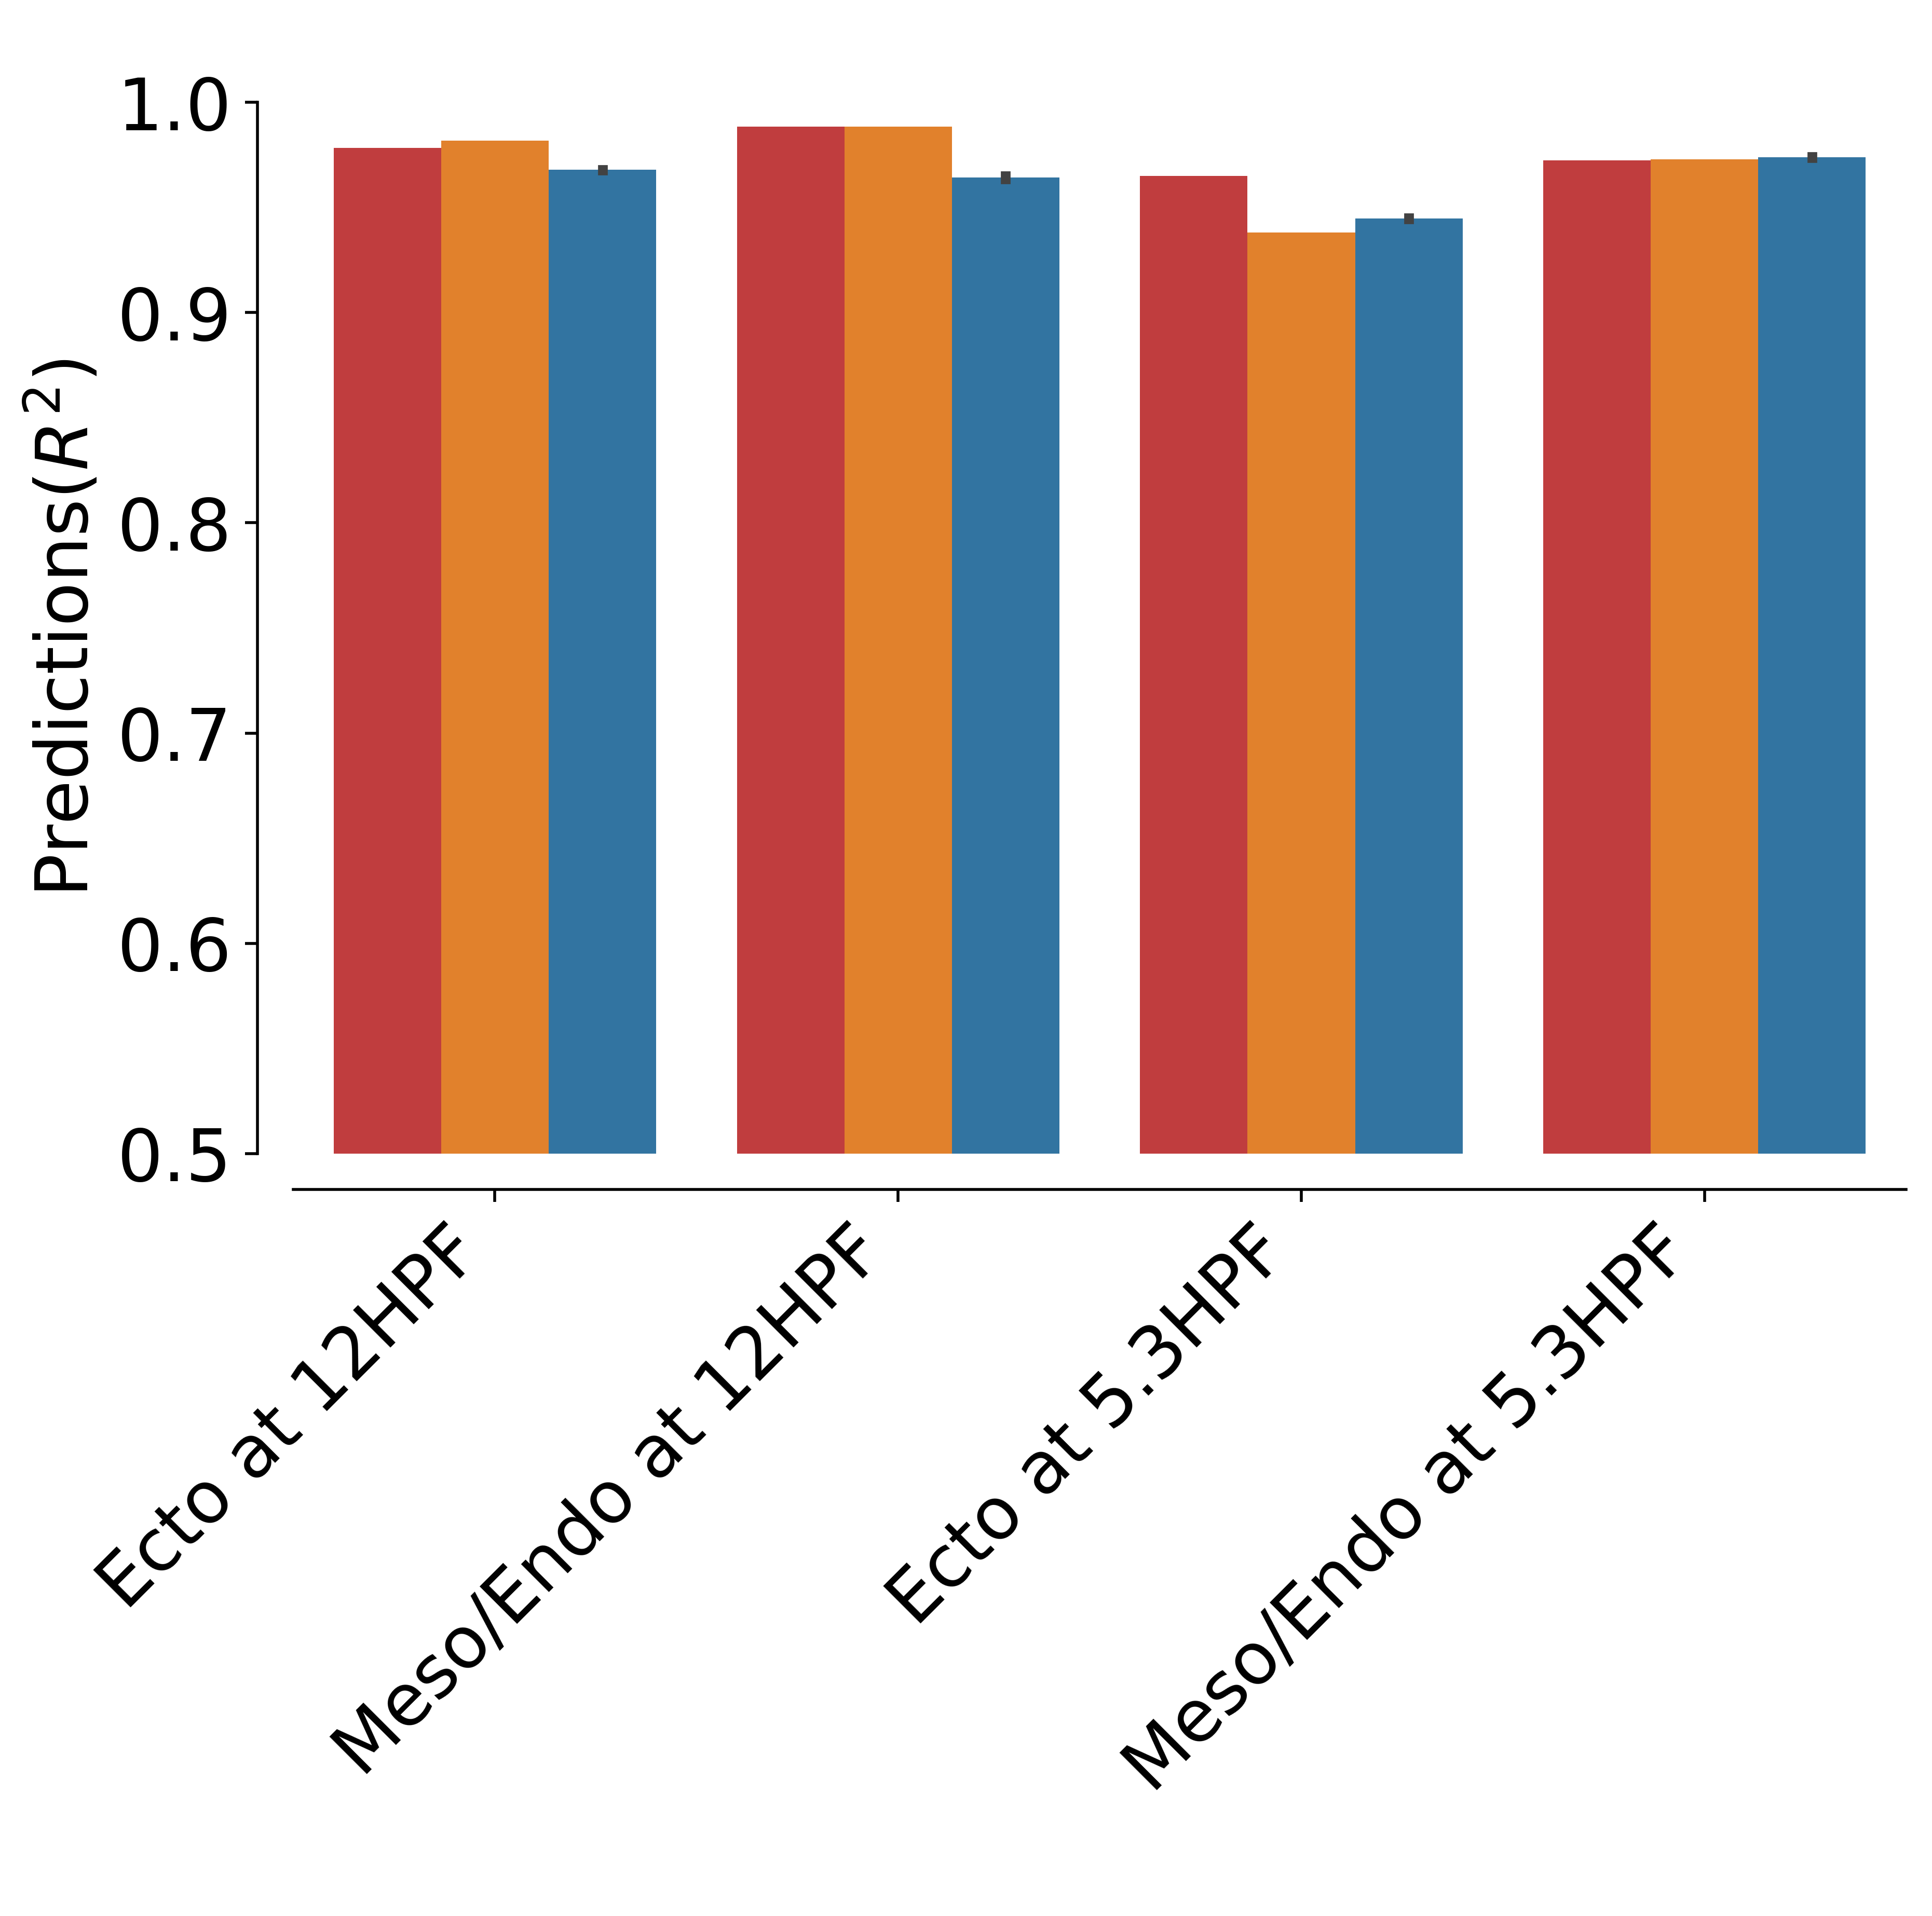

In [19]:
ax = sns.catplot(x ="Prediction",y="Mean correlations",data=data_df,kind="bar",hue="Methods",palette=pca_pal,orient="v",legend= False,aspect=1.5)
font_size = 20
sns.despine(offset=10)
ax.set(ylim=(0.5, 1))
plt.title(" ",fontsize = font_size)
plt.xlabel(' ',fontsize = font_size)
plt.ylabel('Predictions($R^2$)',fontsize = font_size)
plt.tick_params(labelsize=font_size)
plt.xticks(rotation=45,ha='right')
plt.grid(False)

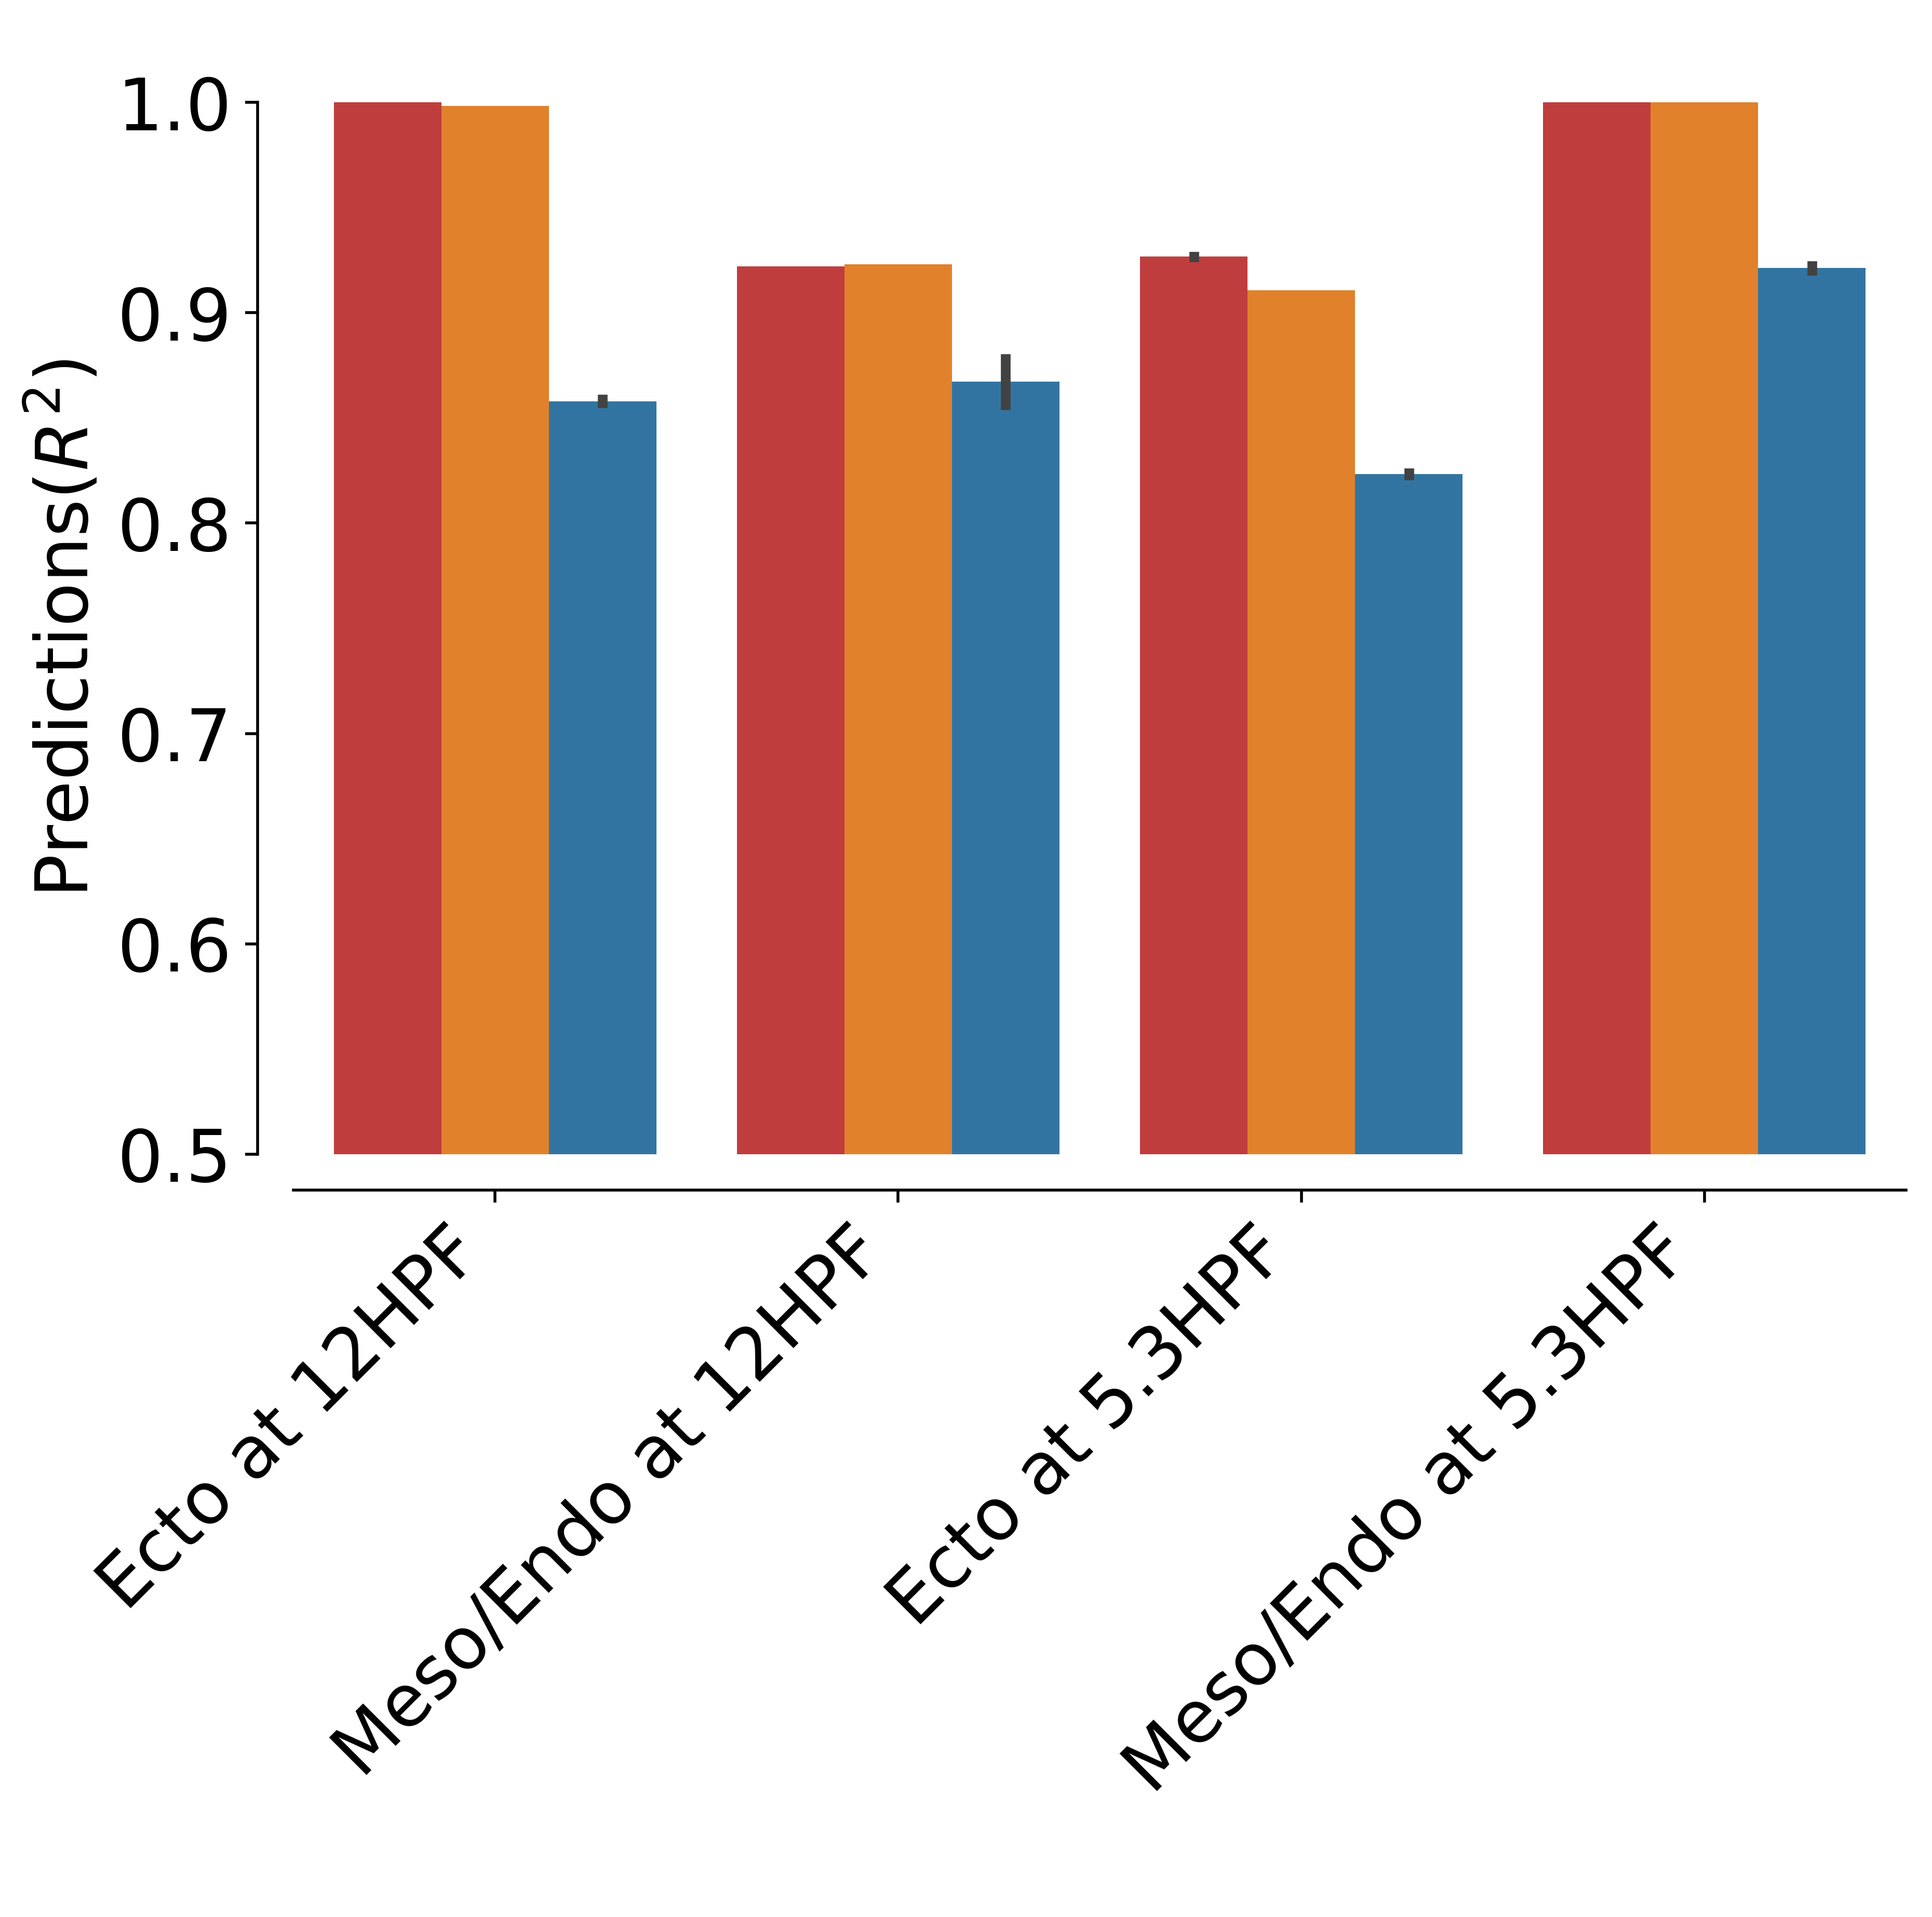

In [20]:
ax = sns.catplot(x ="Prediction",y="Mean_slope",data=data_df,kind="bar",hue="Methods",palette=pca_pal,orient="v",legend= False,aspect=1.5)
font_size = 20
sns.despine(offset=10)
ax.set(ylim=(0.5, 1))
plt.title(" ",fontsize = font_size)
plt.xlabel(' ',fontsize = font_size)
plt.ylabel('Predictions($R^2$)',fontsize = font_size)
plt.tick_params(labelsize=font_size)
plt.xticks(rotation=45,ha='right')
plt.grid(False)

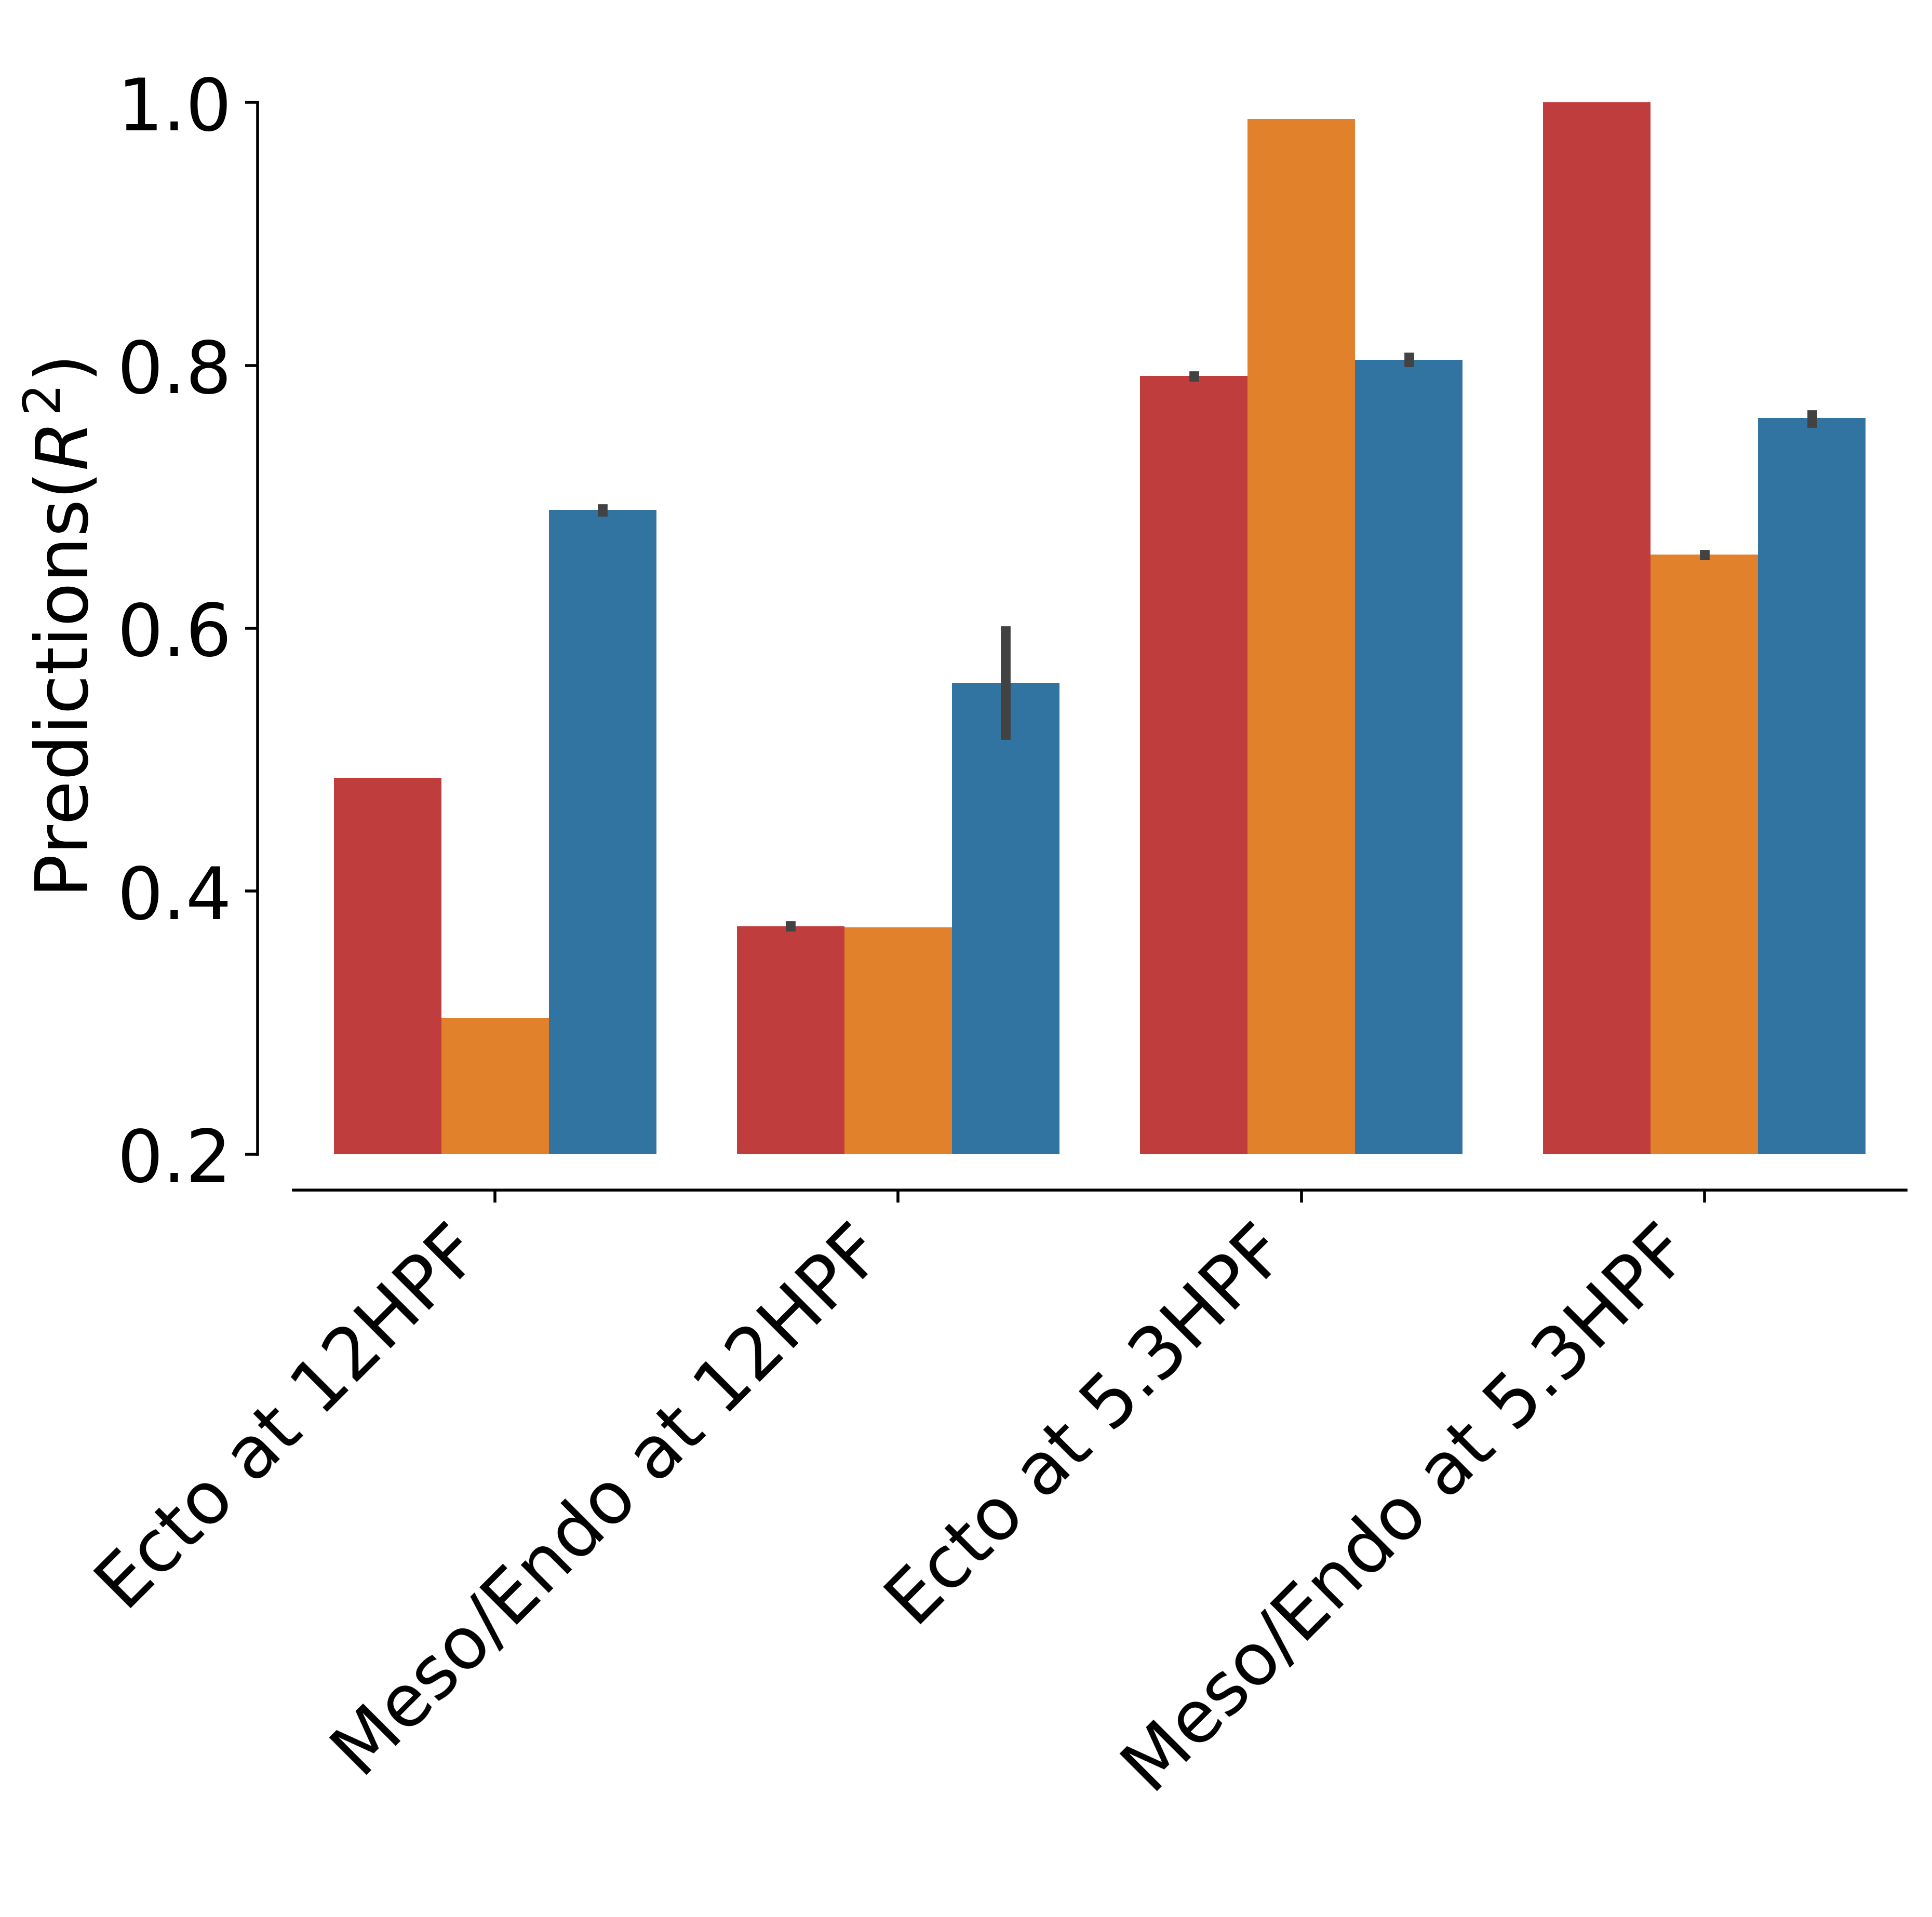

In [21]:
ax = sns.catplot(x ="Prediction",y="Std_slope",data=data_df,kind="bar",hue="Methods",palette=pca_pal,orient="v",legend= False,aspect=1.5)
font_size = 20
sns.despine(offset=10)
ax.set(ylim=(0.2, 1))
plt.title(" ",fontsize = font_size)
plt.xlabel(' ',fontsize = font_size)
plt.ylabel('Predictions($R^2$)',fontsize = font_size)
plt.tick_params(labelsize=font_size)
plt.xticks(rotation=45,ha='right')
plt.grid(False)